In [4]:
#pip! install ucimlrepo
!pip install gprofiler-official

In [87]:
import os
import pandas as pd
import numpy as np 
import scipy
from matplotlib import pyplot as plt
from gprofiler import GProfiler as gprof


# differential expression
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
# Anaconda should automatically install all of these libraries, but if this does not work you might not 
# have these libraries installed. If this is the case, you can install them using pip install. 

import statistics
import math

In [6]:
#DATA FROM: https://www.synapse.org/Synapse:syn2812961

In [59]:
df_LGG = pd.read_csv("/Users/sarahsackeyfio/Desktop/BIO 265/Final Project/unc.edu_LGG_IlluminaHiSeq_RNASeqV2.geneExp.tsv", sep="\t").T
df_GBM = pd.read_csv("/Users/sarahsackeyfio/Desktop/BIO 265/Final Project/unc.edu_GBM_IlluminaHiSeq_RNASeqV2.geneExp.tsv", sep="\t").T

df_GBM.columns= df_GBM.iloc[0]
df_GBM.drop("gene_id", inplace=True)

df_LGG.columns= df_LGG.iloc[0]
df_LGG.drop("gene_id", inplace=True)

df_LGG["tumor"] = "LGG"
df_GBM["tumor"] = "GBM"

df_comb = pd.concat([df_LGG, df_GBM])

tumor_ID = df_comb["tumor"].tolist()
df_comb.drop(df_comb.columns[-1], axis=1, inplace=True)

display(df_comb)
labels = ['LGG', 'GBM']
lgg_label = True
gbm_label = True
colors = []
for t in tumor_ID:
    if t=="LGG":
        colors.append('red')
    elif t=="GBM":
        colors.append('blue')


gene_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
TCGA-CS-4938-01B-11R-1896-07,0.0,8.7141,22.7523,268.576,845.815,0.0,182.505,0.4196,0.0,0.0,...,64.1913,523.18,1311.52,0.0,1495.7,1598.91,1171.81,836.165,777.848,0.0
TCGA-CS-4941-01A-01R-1470-07,0.0,36.4493,21.1767,156.687,390.269,0.0,325.052,1.7253,0.0,0.0,...,105.935,467.564,1226.71,0.3451,1751.21,3889.92,1707.73,1015.53,18.9786,0.0
TCGA-CS-4942-01A-01R-1470-07,0.0,11.8131,11.0242,185.138,621.453,0.0,131.142,0.0,0.0,0.0,...,115.225,454.325,1102.42,0.346,1586.16,2214.53,1423.88,706.92,1706.23,0.0
TCGA-CS-4943-01A-01R-1470-07,0.0,8.6116,5.0835,269.836,835.729,0.0,83.475,0.3261,0.0,0.0,...,89.0183,491.068,1288.32,3.2607,1760.15,2131.55,1916.99,689.321,268.033,0.0
TCGA-CS-4944-01A-01R-1470-07,0.0,0.0,30.261,216.341,812.508,0.0,80.696,0.0,0.0,0.0,...,42.3654,323.793,1012.73,0.5044,1225.07,1692.6,729.794,456.941,19.6697,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-76-4927-01A-01R-1850-01,0.0,2.4096,6.4257,43.0201,620.884,0.0,168.675,0.8032,0.0,0.0,...,48.1928,273.092,933.333,0.0,987.952,7469.08,1244.18,541.365,13.6546,0.0
TCGA-76-4928-01B-01R-1850-01,0.0,10.1709,6.4812,42.4584,533.742,0.0,193.251,0.4382,0.0,0.0,...,36.3716,237.073,850.131,0.0,844.435,16936.9,1024.98,512.708,7.8878,0.0
TCGA-76-4929-01A-01R-1850-01,0.0,8.4757,3.2496,62.2278,668.9,0.0,329.983,0.5583,0.0,0.0,...,89.3356,439.978,1222.78,2.7917,1370.74,2922.39,1862.65,632.607,10.6086,0.0
TCGA-76-4931-01A-01R-1850-01,0.0,6.16,7.9576,58.8188,458.353,0.0,849.412,0.4706,0.0,0.0,...,48.9412,346.824,1261.18,0.9412,1141.65,7212.24,1561.41,568.941,5.1765,0.0


In [86]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# Differential expression analysis 

display(df_GBM)
display(df_LGG)

# concatenate both tumor datasets with tumor data 
combined_tumor_df = pd.concat([df_GBM, df_LGG])
combined_tumor_df_no_tumor = combined_tumor_df.drop(columns=['tumor'])
display(combined_tumor_df.head())
count_matrix = combined_tumor_df.drop(columns=['tumor'])
metadata = pd.DataFrame({'condition': combined_tumor_df['tumor']}, index=combined_tumor_df.index)
display(metadata)

# convert counts to integers for differential expression analysis 
count_matrix = count_matrix.round().astype(int)
count_matrix = count_matrix.values
display(count_matrix)

# create DeseqDataSet 
dds = DeseqDataSet(counts=count_matrix, metadata=metadata)

# Initialize inference engine
inference = DefaultInference(n_cpus=8)

# Create DESeq2 dataset
dds = DeseqDataSet(
    counts=count_matrix, 
    metadata=metadata
)

dds.deseq2()
# Extract results
res = DeseqStats(dds, contrast=['condition', 'GBM', 'LGG'])
res.summary()

# Get the results as a DataFrame
DE_results_df = res.results_df
DE_results_df["gene_name"] = list(combined_tumor_df_no_tumor.columns)
display(DE_results_df)




gene_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,tumor
TCGA-02-0047-01A-01R-1849-01,0.0,3.0732,6.7611,54.7036,886.321,0.0,232.951,0.0,0.0,0.0,...,356.495,1108.82,0.6146,1207.17,3867.97,1397.09,603.583,6.7611,0.0,GBM
TCGA-02-0055-01A-01R-1849-01,0.0,0.0,15.6973,31.3945,885.774,0.0,162.018,0.5606,0.0,0.0,...,280.308,607.708,5.0456,924.457,11481.4,606.027,718.15,12.3336,0.0,GBM
TCGA-02-2483-01A-01R-1849-01,0.0,2.9467,13.9398,60.3441,1234.83,0.0,135.092,0.0,0.0,0.0,...,406.121,866.28,44.3272,1208.65,5066.81,832.084,705.435,398.945,0.0,GBM
TCGA-02-2485-01A-01R-1849-01,0.0,15.9952,14.9571,91.8238,470.0,0.0,417.619,1.9048,0.0,0.0,...,274.286,1345.71,0.0,1070.0,5090.95,1139.52,700.476,15.7143,0.0,GBM
TCGA-02-2486-01A-01R-1849-01,0.0,5.561,4.8049,62.5366,546.341,0.0,276.219,0.0,0.0,0.0,...,198.171,652.439,0.0,689.634,7800.0,627.439,527.439,69.5122,0.0,GBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-76-4927-01A-01R-1850-01,0.0,2.4096,6.4257,43.0201,620.884,0.0,168.675,0.8032,0.0,0.0,...,273.092,933.333,0.0,987.952,7469.08,1244.18,541.365,13.6546,0.0,GBM
TCGA-76-4928-01B-01R-1850-01,0.0,10.1709,6.4812,42.4584,533.742,0.0,193.251,0.4382,0.0,0.0,...,237.073,850.131,0.0,844.435,16936.9,1024.98,512.708,7.8878,0.0,GBM
TCGA-76-4929-01A-01R-1850-01,0.0,8.4757,3.2496,62.2278,668.9,0.0,329.983,0.5583,0.0,0.0,...,439.978,1222.78,2.7917,1370.74,2922.39,1862.65,632.607,10.6086,0.0,GBM
TCGA-76-4931-01A-01R-1850-01,0.0,6.16,7.9576,58.8188,458.353,0.0,849.412,0.4706,0.0,0.0,...,346.824,1261.18,0.9412,1141.65,7212.24,1561.41,568.941,5.1765,0.0,GBM


gene_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,tumor
TCGA-CS-4938-01B-11R-1896-07,0.0,8.7141,22.7523,268.576,845.815,0.0,182.505,0.4196,0.0,0.0,...,523.18,1311.52,0.0,1495.7,1598.91,1171.81,836.165,777.848,0.0,LGG
TCGA-CS-4941-01A-01R-1470-07,0.0,36.4493,21.1767,156.687,390.269,0.0,325.052,1.7253,0.0,0.0,...,467.564,1226.71,0.3451,1751.21,3889.92,1707.73,1015.53,18.9786,0.0,LGG
TCGA-CS-4942-01A-01R-1470-07,0.0,11.8131,11.0242,185.138,621.453,0.0,131.142,0.0,0.0,0.0,...,454.325,1102.42,0.346,1586.16,2214.53,1423.88,706.92,1706.23,0.0,LGG
TCGA-CS-4943-01A-01R-1470-07,0.0,8.6116,5.0835,269.836,835.729,0.0,83.475,0.3261,0.0,0.0,...,491.068,1288.32,3.2607,1760.15,2131.55,1916.99,689.321,268.033,0.0,LGG
TCGA-CS-4944-01A-01R-1470-07,0.0,0.0,30.261,216.341,812.508,0.0,80.696,0.0,0.0,0.0,...,323.793,1012.73,0.5044,1225.07,1692.6,729.794,456.941,19.6697,0.0,LGG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WY-A85A-01A-21R-A36H-07,0.0,5.4526,16.189,124.919,658.221,0.0,540.512,1.0557,0.0,0.0,...,351.016,1263.13,0.0,1491.69,1497.49,1556.08,664.555,7.3898,0.0,LGG
TCGA-WY-A85B-01A-11R-A36H-07,0.0,8.2616,19.7074,133.739,662.651,0.0,610.155,2.1515,0.0,0.0,...,503.012,1347.68,0.8606,1443.63,1574.87,1685.89,836.919,7471.6,0.0,LGG
TCGA-WY-A85C-01A-11R-A36H-07,0.0,11.5121,18.7291,120.924,524.724,0.0,837.76,3.2693,0.0,0.0,...,530.854,1556.19,2.8606,1855.74,1927.67,2006.13,910.094,3013.89,0.0,LGG
TCGA-WY-A85D-01A-11R-A36H-07,0.0,5.3895,8.9103,107.254,705.128,0.0,805.72,0.4931,0.0,0.0,...,312.13,1456.11,0.0,1222.88,1706.11,1429.49,771.203,1563.12,0.0,LGG


gene_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,tumor
TCGA-02-0047-01A-01R-1849-01,0.0,3.0732,6.7611,54.7036,886.321,0.0,232.951,0.0,0.0,0.0,...,356.495,1108.82,0.6146,1207.17,3867.97,1397.09,603.583,6.7611,0.0,GBM
TCGA-02-0055-01A-01R-1849-01,0.0,0.0,15.6973,31.3945,885.774,0.0,162.018,0.5606,0.0,0.0,...,280.308,607.708,5.0456,924.457,11481.4,606.027,718.15,12.3336,0.0,GBM
TCGA-02-2483-01A-01R-1849-01,0.0,2.9467,13.9398,60.3441,1234.83,0.0,135.092,0.0,0.0,0.0,...,406.121,866.28,44.3272,1208.65,5066.81,832.084,705.435,398.945,0.0,GBM
TCGA-02-2485-01A-01R-1849-01,0.0,15.9952,14.9571,91.8238,470.0,0.0,417.619,1.9048,0.0,0.0,...,274.286,1345.71,0.0,1070.0,5090.95,1139.52,700.476,15.7143,0.0,GBM
TCGA-02-2486-01A-01R-1849-01,0.0,5.561,4.8049,62.5366,546.341,0.0,276.219,0.0,0.0,0.0,...,198.171,652.439,0.0,689.634,7800.0,627.439,527.439,69.5122,0.0,GBM


,condition
TCGA-02-0047-01A-01R-1849-01,GBM
TCGA-02-0055-01A-01R-1849-01,GBM
TCGA-02-2483-01A-01R-1849-01,GBM
TCGA-02-2485-01A-01R-1849-01,GBM
TCGA-02-2486-01A-01R-1849-01,GBM
...,...
TCGA-WY-A85A-01A-21R-A36H-07,LGG
TCGA-WY-A85B-01A-11R-A36H-07,LGG
TCGA-WY-A85C-01A-11R-A36H-07,LGG
TCGA-WY-A85D-01A-11R-A36H-07,LGG


array([[   0,    3,    6, ...,  603,    6,    0],
       [   0,    0,   15, ...,  718,   12,    0],
       [   0,    2,   13, ...,  705,  398,    0],
       ...,
       [   0,   11,   18, ...,  910, 3013,    0],
       [   0,    5,    8, ...,  771, 1563,    0],
       [   0,    9,    7, ...,  626, 1209,    0]])

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.49 seconds.

Fitting dispersions...
... done in 2.43 seconds.

Fitting dispersion trend curve...
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 2.65 seconds.

Fitting LFCs...
... done in 2.28 seconds.

Calculating cook's distance...
... done in 1.74 seconds.

Replacing 1538 outlier genes.

Fitting dispersions...
... done in 0.21 seconds.

Fitting MAP dispersions...
... done in 0.22 seconds.

Fitting LFCs...
... done in 0.15 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition GBM vs LGG
          baseMean  log2FoldChange     lfcSE       stat         pvalue  \
0         0.002713       -0.018600  3.363512  -0.005530   9.955877e-01   
1         8.747384       -0.657944  0.112746  -5.835628   5.358844e-09   
2        14.401774       -0.837110  0.081040 -10.329643   5.175285e-25   
3       127.749062       -1.387450  0.041574 -33.373128  3.365165e-244   
4       653.475714       -0.058501  0.038351  -1.525406   1.271577e-01   
...            ...             ...       ...        ...            ...   
20526  3900.964471        1.349784  0.068244  19.778762   4.536935e-87   
20527  1538.247579       -0.687236  0.038679 -17.767606   1.259518e-70   
20528   616.438872        0.127568  0.042910   2.972951   2.949515e-03   
20529   520.523009       -3.691808  0.192538 -19.174409   6.055269e-82   
20530     0.004314       -0.024004  3.363500  -0.007136   9.943060e-01   

                padj  
0       9.998997e-01  
1     

... done in 0.83 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
0,0.002713,-0.018600,3.363512,-0.005530,9.955877e-01,9.998997e-01,?|100130426
1,8.747384,-0.657944,0.112746,-5.835628,5.358844e-09,1.040379e-08,?|100133144
2,14.401774,-0.837110,0.081040,-10.329643,5.175285e-25,1.907275e-24,?|100134869
3,127.749062,-1.387450,0.041574,-33.373128,3.365165e-244,3.181363e-241,?|10357
4,653.475714,-0.058501,0.038351,-1.525406,1.271577e-01,1.573953e-01,?|10431
...,...,...,...,...,...,...,...
20526,3900.964471,1.349784,0.068244,19.778762,4.536935e-87,1.602701e-85,ZYX|7791
20527,1538.247579,-0.687236,0.038679,-17.767606,1.259518e-70,2.510563e-69,ZZEF1|23140
20528,616.438872,0.127568,0.042910,2.972951,2.949515e-03,4.189206e-03,ZZZ3|26009
20529,520.523009,-3.691808,0.192538,-19.174409,6.055269e-82,1.754967e-80,psiTPTE22|387590


/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         9.955877e-01
1         5.358844e-09
2         5.175285e-25
3        3.365165e-244
4         1.271577e-01
             ...      
20526     4.536935e-87
20527     1.259518e-70
20528     2.949515e-03
20529     6.055269e-82
20530     9.943060e-01
Name: pvalue, Length: 20531, dtype: float64
Benjamini-Hochberg Threshold: 9.69e-11


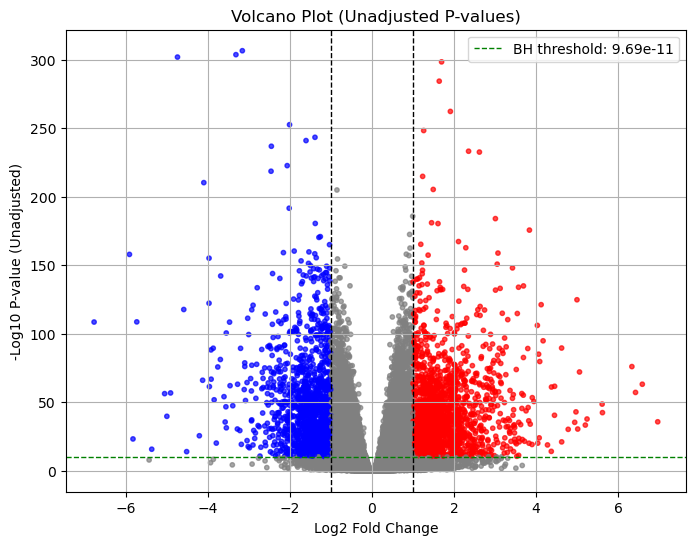

In [ ]:
# CREATING VOLCANO PLOT 

# formatting differential expression dataframe 
DE_results_df['-log10(pvalue)'] = -np.log10(DE_results_df['pvalue'])
log_fold_change_thresh = 1
pval_thresh = 0.05
DE_results_df['color'] = 'gray'

# Visualize differential expression dataframe 
print(DE_results_df['pvalue'])


# Benjamini Hochberg Calculation 

all_pvals = DE_results_df['padj'].tolist()
all_pvals.sort()
n_tests = len(all_pvals)
alpha_cutoff = np.arange(0, n_tests)*((0.08 - 0.08/n_tests))/n_tests + 0.08/n_tests
n_pvals_below_cutoff = len([x for x in alpha_cutoff - all_pvals if x >= 0])
BH_pval_threshold = all_pvals[n_pvals_below_cutoff-1]
BH_threshold_log10 = -np.log10(BH_pval_threshold)

print(f"Benjamini-Hochberg Threshold: {BH_pval_threshold:.2e}")

# Coloring only results that are above BH threshold and significantly upregulated/downregulated

DE_results_df.loc[(DE_results_df['log2FoldChange'] >= log_fold_change_thresh) & 
                  (DE_results_df['padj'] < BH_pval_threshold), 'color'] = 'red'  # Upregulated 

DE_results_df.loc[(DE_results_df['log2FoldChange'] <= -log_fold_change_thresh) & 
                  (DE_results_df['padj'] < BH_pval_threshold), 'color'] = 'blue'  # Downregulated 


# Creating volcano plot 
plt.figure(figsize=(8, 6))
plt.scatter(DE_results_df['log2FoldChange'], DE_results_df['-log10(pvalue)'], c=DE_results_df['color'], alpha=0.7, s=10)

# log fold change boundaries 
plt.axvline(x=log_fold_change_thresh, color='black', linestyle='--', linewidth=1) 
plt.axvline(x=-log_fold_change_thresh, color='black', linestyle='--', linewidth=1) 

# Benjamini-Hochberg threshold 
plt.axhline(y=-np.log10(BH_pval_threshold), color='green', linestyle='--', linewidth=1, label=f'BH threshold: {BH_pval_threshold:.2e}')

# Labels and title
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value (Unadjusted)")
plt.title("Volcano Plot (Unadjusted P-values)")

# Grid and show plot
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# GENE ENRICHMENT ANALYSIS

# pull out top 3 differentially expressed genes by log2foldchange 
top_3_genes = DE_results_df.loc[DE_results_df['log2FoldChange'].abs().nlargest(3).index]
print(top_3_genes[['gene_name', 'log2FoldChange', 'pvalue']])

top_3_gene_names = ['MMP13', 'DGKK', 'SAA2']
top_3_gene_IDs = ['4322', '139189', '6289']


# Pull out top genes pathways 
# Gene Ontology Analysis

gp = gprof(return_dataframe=True)

# Run GO enrichment for the top 3 genes
go_results = gp.profile(organism="hsapiens", query=top_3_gene_IDs, all_results=True)

top_15_go = go_results.nsmallest(15, 'p_value')
print(top_15_go[['name', 'source', 'p_value']])

display(top_3_genes[['gene_name', 'log2FoldChange', 'pvalue']])
display(top_15_go[['name', 'source', 'p_value']])




         gene_name  log2FoldChange         pvalue
11013   MMP13|4322        6.960600   1.868872e-36
4893   DGKK|139189       -6.767748  2.667417e-109
15461    SAA2|6289        6.585083   6.890508e-64
                                                 name source   p_value
0                       cartilage; chondrocytes[High]    HPA  0.014959
1                                           cartilage    HPA  0.022439
2                       cartilage; chondrocytes[≥Low]    HPA  0.022439
3                    cartilage; chondrocytes[≥Medium]    HPA  0.022439
4                              Progressive leg bowing     HP  0.049962
5                          Flared, irregular rib ends     HP  0.049962
6                                      hsa-miR-127-3p  MIRNA  0.085067
7                       Irregular sclerotic endplates     HP  0.099924
8                               Pear-shaped vertebrae     HP  0.099924
9                    Abnormal growth plate morphology     HP  0.149886
10                 

,gene_name,log2FoldChange,pvalue
11013,MMP13|4322,6.960600,1.868872e-36
4893,DGKK|139189,-6.767748,2.667417e-109
15461,SAA2|6289,6.585083,6.890508e-64


,name,source,p_value
0,cartilage; chondrocytes[High],HPA,0.014959
1,cartilage,HPA,0.022439
2,cartilage; chondrocytes[≥Low],HPA,0.022439
3,cartilage; chondrocytes[≥Medium],HPA,0.022439
4,Progressive leg bowing,HP,0.049962
5,"Flared, irregular rib ends",HP,0.049962
6,hsa-miR-127-3p,MIRNA,0.085067
7,Irregular sclerotic endplates,HP,0.099924
8,Pear-shaped vertebrae,HP,0.099924
9,Abnormal growth plate morphology,HP,0.149886
